XMS3GU050 - EARTH AND PLANETARY
INTERIORS 

Interior dynamics – Mars

Demur Merkviladze

30.10.2024

In [63]:
import matplotlib.pyplot as plt 
import numpy as np

In [64]:
# Given constants
pi = np.pi  # Pi constant
G = 6.6738E-11  # Gravitational constant in m³/kg/s²
GM = 4.28284E13  # Gravitational parameter in m³/s² (converted from km³/s²)
R = 3390E3  # Radius of Mars in meters (converted from km)
R_c = 1835E3 # Radius of Mars core in meters (converted from km)
R_g = 8.3145 # Perfect gas constant in J/k/mol
Moi = 0.3652 # Moment of inertia (dimensionless)
T_c = 210 # Surface temperature in K

# Already calculated elsewhere
rho_m = 3448  # Density of mantle in kg/m³
rho_c = 6499  # Density of core in kg/m³

# Mass of Mars (from GM and G)
Mass = GM / G  # kg

# Gravitational acceleration at the surface of Mars
g = GM / R**2  # m/s²

# Radioactive heating parameters
H0 = 2e-11  # Initial heat production rate (W/kg)
lambda_val = 4.39e-4  # Decay constant in Myr^-1


# Time in million years
t = 4500  # Myr

# Function to calculate radioactive heating over time
def radioactive_heating(t, H0, lambda_val):
    return H0 * np.exp(-lambda_val * t)

# Calculate radioactive heating
H = radioactive_heating(t, H0, lambda_val)  # W/kg

print(f"Mass = {Mass} kg")
print(f"Gravitational acceleration = {g:.2f} m/s²")
print(f"radioactive heating = {H} W/kg")


Mass = 6.417393389073691e+23 kg
Gravitational acceleration = 3.73 m/s²
radioactive heating = 2.7738389785821457e-12 W/kg


In [65]:
# Constants for silicates
Q = 250 * 1e3  # wet diffusion for silicates J/mol (converted from kJ/mol)
η_ref = 3.10E21 # viscosity in Pa.s (K) at reference temperature 1600 K
α = 3E-5  # thermal expansion K^-1
k = 3  # thermal conductivity W/m/K
Cp = 1180  # specific heat J/kg/K
Ra_TBL = 70  # convective Rayleigh number 

# Temperature range
T_min = 1400  # convective temperatures K
T_max = 1800  # convective temperatures K
T_range = np.linspace(T_min, T_max, 5)  # Generate 5 values between 1400 K and 1800 K

# Calculate ΔTη and ΔT_TBL
ΔTη = (R_g * T_range**2) / Q
ΔT_TBL = 2.23 * ΔTη

# Calculate viscosity η as a function of temperature
η = η_ref * np.exp(Q / R_g * (1/T_range - 1/1600))

# Calculate T_sl (temperature at the stagnant lid)
T_sl = T_range - ΔT_TBL

# Calculate thermal diffusivity
kappa = k/(rho_m * Cp)


# Calculate depth (d) from Rayleigh number as a function of Ra_TBL, k, η, α, rho_m, and T_sl
d = ((Ra_TBL * kappa * η) / (α * rho_m * T_sl))**(1/3)

# convert the depth (d) to kilometers 
d_km = d / 1000

# Calculating the gradient dT/dt
gradient = ΔT_TBL/d

# Calculating the stagnant lead thickness 
D_sl = (T_sl - T_c)/gradient

# Calculating the depth of boundary layer
D_d_sl = D_sl + d

# convert the depth to kilometers 
Total_thickness_km = D_d_sl/1000

# Output results with units and rounded to 2 decimal places
for i, T in enumerate(T_range):
    print(f"Convective Temperature T = {T:.2f} K")
    print(f"ΔTη (Temperature change due to viscosity) = {ΔTη[i]:.2f} K")
    print(f"ΔT_TBL (Temperature difference across TBL) = {ΔT_TBL[i]:.2f} K")
    print(f"T_sl (Temperature at stagnant lid) = {T_sl[i]:.2f} K")
    print(f"κ (Thermal diffusivity) = {kappa:.2e} m²/s")
    print(f"η (Viscosity) = {η[i]:.2e} Pa·s")
    print(f"d (Thickness of boundary layer) = {d_km[i]:.2f} km\n")
    print(f"D_d_sl (Depth of boundary layer) = {Total_thickness_km[i]:.2f} km\n")


Convective Temperature T = 1400.00 K
ΔTη (Temperature change due to viscosity) = 65.19 K
ΔT_TBL (Temperature difference across TBL) = 145.36 K
T_sl (Temperature at stagnant lid) = 1254.64 K
κ (Thermal diffusivity) = 7.37e-07 m²/s
η (Viscosity) = 4.54e+22 Pa·s
d (Thickness of boundary layer) = 262.39 km

D_d_sl (Depth of boundary layer) = 2148.03 km

Convective Temperature T = 1500.00 K
ΔTη (Temperature change due to viscosity) = 74.83 K
ΔT_TBL (Temperature difference across TBL) = 166.87 K
T_sl (Temperature at stagnant lid) = 1333.13 K
κ (Thermal diffusivity) = 7.37e-07 m²/s
η (Viscosity) = 1.09e+22 Pa·s
d (Thickness of boundary layer) = 159.55 km

D_d_sl (Depth of boundary layer) = 1233.38 km

Convective Temperature T = 1600.00 K
ΔTη (Temperature change due to viscosity) = 85.14 K
ΔT_TBL (Temperature difference across TBL) = 189.86 K
T_sl (Temperature at stagnant lid) = 1410.14 K
κ (Thermal diffusivity) = 7.37e-07 m²/s
η (Viscosity) = 3.10e+21 Pa·s
d (Thickness of boundary layer) = 10

In [66]:
# Now we calculate solidus and liquidus temperatures
def pressure_from_depth(depth):
    """Convert depth (km) to pressure (GPa)."""
    return (rho_m * g * depth * 1e3) * 1e-9  # Convert depth from km to m and pressure to GPa

def calculate_pressure(T_s_C):
    """
    Calculate pressure from solidus temperature
    T_s_C: Temperature in Celsius
    Returns: Pressure in GPa
    """
    return (T_s_C - 1100) / 136 + 4.968e-4 * np.exp(0.012 * (T_s_C - 1100))

def liquidus_temperature(P):
    """
    Calculate liquidus temperature from pressure
    P: Pressure in GPa
    Returns: Temperature in Celsius
    """
    return 1736.2 + 4.343 * P + 180 * np.arctan(P / 2.2169)

# Create depth array up to where P = 6 GPa
max_depth = 6 * 1e9 / (rho_m * g * 1e3)  # depth where P = 6 GPa
depths = np.linspace(0, max_depth, 1000)  # Depth array in km
pressures = pressure_from_depth(depths)

# Calculate liquidus temperatures
liquidus_temps_C = liquidus_temperature(pressures)
liquidus_temps_K = liquidus_temps_C + 273.15

# Calculate solidus temperatures and corresponding depths
T_s_range_C = np.linspace(1100, 2000, 1000)  # Range of solidus temperatures in Celsius
P_s = calculate_pressure(T_s_range_C)

# Filter out invalid pressures (> 6 GPa)
valid_mask = P_s <= 6
T_s_range_C = T_s_range_C[valid_mask]
P_s = P_s[valid_mask]

# Convert solidus temperatures to Kelvin and calculate depths
T_s_range_K = T_s_range_C + 273.15
depths_solidus = P_s * 1e9 / (rho_m * g * 1e3)  # Convert pressures to depths

# Print verification points
print("Verification points:")
print(f"At surface (depth = 0 km):")
print(f"Pressure = {pressures[0]:.2f} GPa")
print(f"Liquidus T = {liquidus_temps_C[0]:.1f}°C ({liquidus_temps_K[0]:.1f}K)")

print(f"\nAt maximum valid depth ({max_depth:.1f} km):")
print(f"Pressure = {pressures[-1]:.2f} GPa")
print(f"Liquidus T = {liquidus_temps_C[-1]:.1f}°C ({liquidus_temps_K[-1]:.1f}K)")

Verification points:
At surface (depth = 0 km):
Pressure = 0.00 GPa
Liquidus T = 1736.2°C (2009.3K)

At maximum valid depth (466.9 km):
Pressure = 6.00 GPa
Liquidus T = 1981.3°C (2254.4K)


In [67]:
# Calculate heat flux (q) 
q = (k * ΔT_TBL / d) * 1000 #  Convert to mW/m²


# Calculate Urey number (U)
# Convert internal heating (W/kg) to W/m² using mantle thickness (d)
internal_heat_production = (H * rho_m * d) * 1000 # Convert to mW/m²


# Calculate Urey number (U)
Urey_number = internal_heat_production / q  # Ratio of internal heating to surface heat flux

# Output results
for i, T in enumerate(T_range):
    print(f"Convective Temperature = {T:.1f} K")
    print(f"Heat Flux = {q[i]:.2f} mW/m^2")
    print(f"Internal Heat Production = {internal_heat_production[i]:.2f} mW/m^2")
    print(f"Urey Number = {Urey_number[i]:.3f}\n")


Convective Temperature = 1400.0 K
Heat Flux = 1.66 mW/m^2
Internal Heat Production = 2.51 mW/m^2
Urey Number = 1.510

Convective Temperature = 1500.0 K
Heat Flux = 3.14 mW/m^2
Internal Heat Production = 1.53 mW/m^2
Urey Number = 0.486

Convective Temperature = 1600.0 K
Heat Flux = 5.52 mW/m^2
Internal Heat Production = 0.99 mW/m^2
Urey Number = 0.179

Convective Temperature = 1700.0 K
Heat Flux = 9.17 mW/m^2
Internal Heat Production = 0.67 mW/m^2
Urey Number = 0.073

Convective Temperature = 1800.0 K
Heat Flux = 14.50 mW/m^2
Internal Heat Production = 0.48 mW/m^2
Urey Number = 0.033



For T = 1400 K, depth of boundary layer: 2148.03 km
For T = 1500 K, depth of boundary layer: 1233.38 km
For T = 1600 K, depth of boundary layer: 755.04 km
For T = 1700 K, depth of boundary layer: 487.42 km
For T = 1800 K, depth of boundary layer: 328.98 km


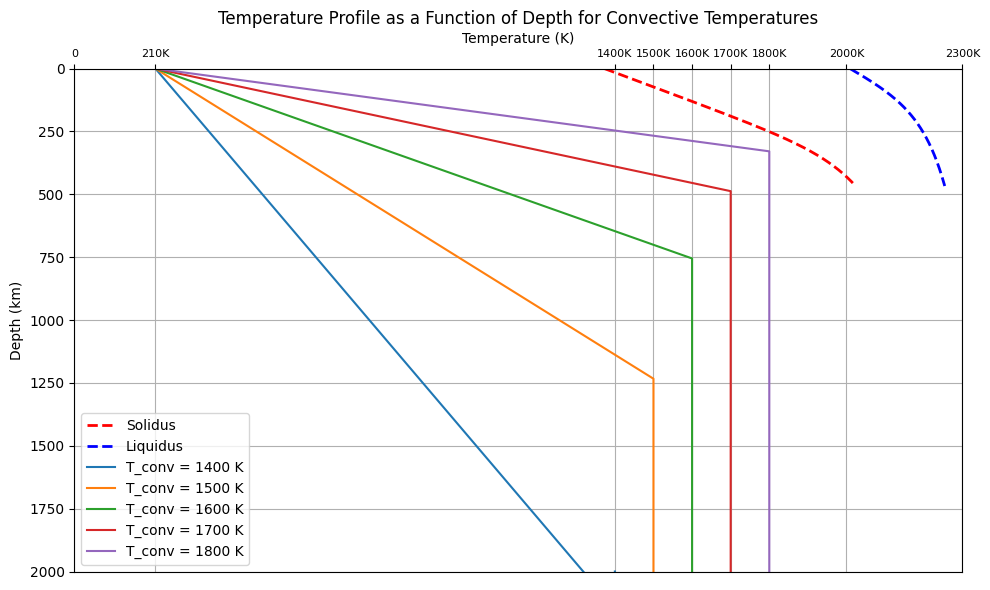

In [68]:
# Plotting temperature profile for each convective temperature
plt.figure(figsize=(10, 6))

# Plot solidus and liquidus curves
plt.plot(T_s_range_K, depths_solidus, 'r--', label='Solidus', linewidth=2)
plt.plot(liquidus_temps_K, depths, 'b--', label='Liquidus', linewidth=2)

for i, T in enumerate(T_range):
    # Use the already calculated d as the convective_depth
    convective_depth = D_d_sl[i] / 1000  # Convert to km
    
    # Create temperature and depth arrays for the two-segment profile
    temp_profile = [T_c, T, T]
    depth_profile = [0, convective_depth, 2000]  
    
    # Plot the temperature profile against depth
    plt.plot(temp_profile, depth_profile, label=f'T_conv = {T:.0f} K')
    
    # Print the depth at which the curve becomes vertical
    print(f"For T = {T:.0f} K, depth of boundary layer: {convective_depth:.2f} km")

# Customizing the plot
plt.gca().invert_yaxis()  # Reversing y-axis for depth
plt.xlim(0, T_max + 500)  
plt.ylim(2000, 0) 
plt.xlabel('Temperature (K)')
plt.ylabel('Depth (km)')
plt.title('Temperature Profile as a Function of Depth for Convective Temperatures')
plt.legend(loc='lower left')
plt.grid(True)

# x-axis ticks and labels
plt.xticks([0, 210, 1400, 1500, 1600, 1700, 1800, 2000, 2300], 
           ['0', '210K', '1400K', '1500K', '1600K', '1700K', '1800K', '2000K', '2300K'],
           fontsize=8)

# Move x-axis labels to the top
plt.gca().xaxis.tick_top()
plt.gca().xaxis.set_label_position('top') 
plt.xticks(rotation=0)  # x-axis labels horizontal
plt.savefig('T_profile.png')

plt.tight_layout()
plt.show()